In [2]:
# Firsst we will import imp. libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Variable Identification

In [5]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
train.shape

(31647, 18)

In [7]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [8]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


# Univariate Analysis

In [10]:
train["subscribed"].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [11]:
train["subscribed"].value_counts(normalize = True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

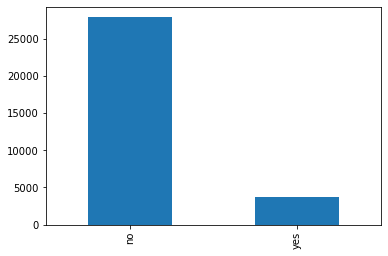

In [12]:
train["subscribed"].value_counts().plot.bar()

<AxesSubplot:xlabel='age', ylabel='Density'>

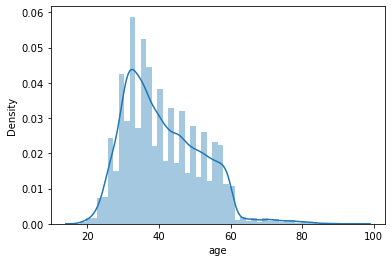

In [13]:
sn.distplot(train["age"])

<AxesSubplot:>

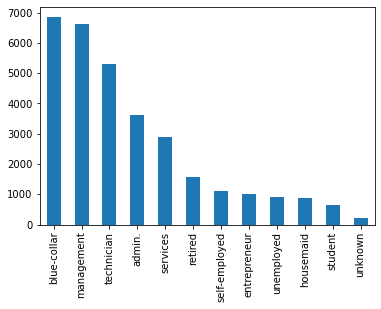

In [14]:
train["job"].value_counts().plot.bar()

In [15]:
train['job'].value_counts(normalize = False)

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<AxesSubplot:>

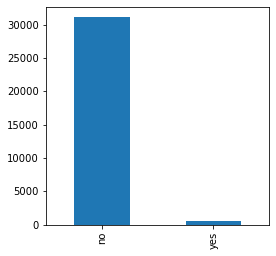

In [16]:
train['default'].value_counts().plot(kind=("bar"),figsize=(4,4))

In [17]:
train['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

# Bivariate Analysis

In [18]:
job = pd.crosstab(train["job"],train["subscribed"])

In [19]:
job

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


Text(0, 0.5, 'Percentage')

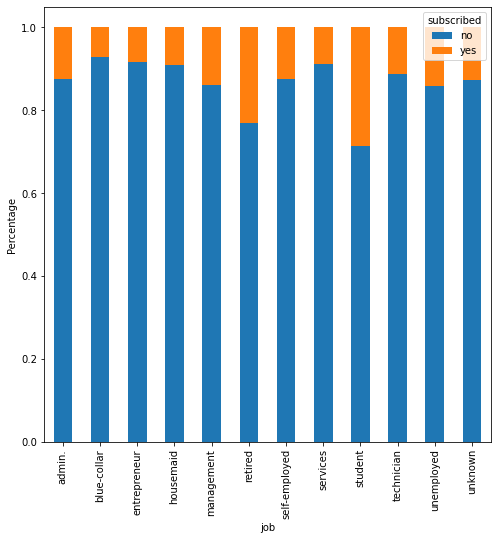

In [20]:
job.div(job.sum(1).astype(float), axis = 0).plot(kind= "bar", stacked= True, figsize =(8,8))
plt.xlabel("job")
plt.ylabel("Percentage")

In [21]:
default = pd.crosstab(train["default"],train["subscribed"])

Text(0, 0.5, 'Percentage')

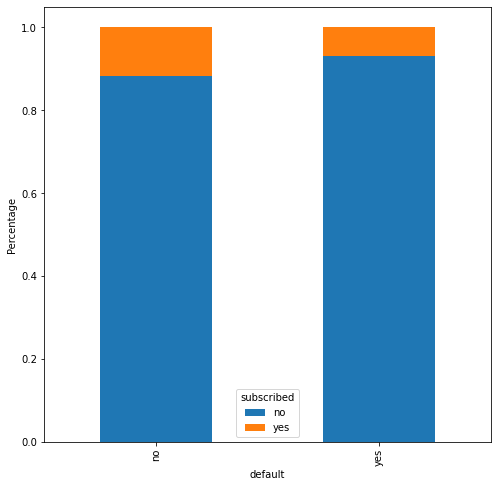

In [22]:
default.div(default.sum(1).astype(float),axis=0).plot(kind="bar", stacked= True, figsize=(8,8))
plt.ylabel("Percentage")

In [23]:
train["subscribed"].replace("no",0,inplace=True)
train["subscribed"].replace("yes",1,inplace=True)

<AxesSubplot:>

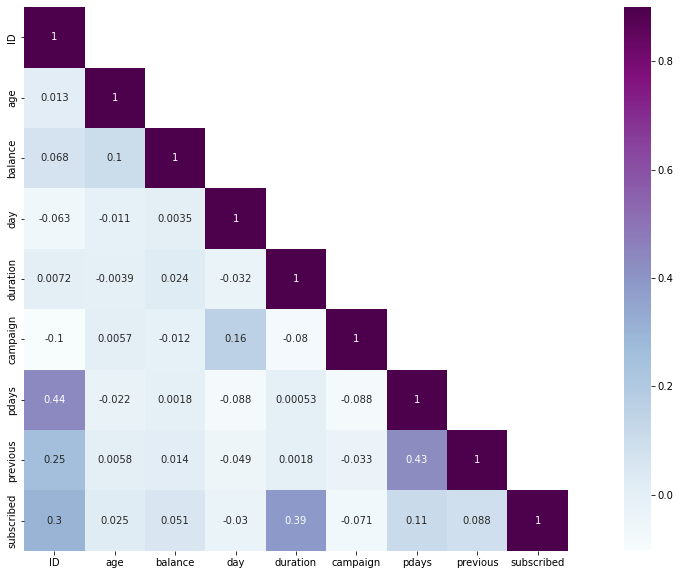

In [24]:
corr= train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)]= False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr,mask=mask,vmax=.9,square = True,annot=True,cmap="BuPu")

# Missing Values

In [ ]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# Variable Transformation 

In [26]:
def preprocessing_data(train_data):
    bins = [0,21,60,100]
    groups = ['underage','adults','senior citizens']
    train_data['age_binned'] = pd.cut(train_data['age'],bins,labels=groups)
    train_data['age_binned'].replace('adults',0,inplace=True)
    train_data['age_binned'].replace('underage',1,inplace=True)
    train_data['age_binned'].replace('senior citizens',2,inplace=True)
    train_data.drop('age',axis=1,inplace=True)
    
    train_data['default'].replace('no',0,inplace=True)
    train_data['default'].replace('yes',1,inplace=True)
    
    train_data['housing'].replace('no',1,inplace=True)
    train_data['housing'].replace('yes',0,inplace=True)
    
    train_data['loan'].replace('no',1,inplace=True)
    train_data['loan'].replace('yes',0,inplace=True)
    
    train_data['contact'].replace('cellular',2,inplace=True)
    train_data['contact'].replace('telephone',1,inplace=True)
    train_data['contact'].replace('unknown',0,inplace=True)
    
    train_data['month'].replace('dec',1,inplace=True)
    train_data['month'].replace('mar',1,inplace=True)
    train_data['month'].replace('oct',1,inplace=True)
    train_data['month'].replace('sep',1,inplace=True)
    train_data['month'].replace('apr',0,inplace=True)
    train_data['month'].replace('aug',0,inplace=True)
    train_data['month'].replace('feb',0,inplace=True)
    train_data['month'].replace('jan',0,inplace=True) 
    train_data['month'].replace('jul',0,inplace=True)
    train_data['month'].replace('jun',0,inplace=True)
    train_data['month'].replace('may',0,inplace=True)
    train_data['month'].replace('nov',0,inplace=True)
    
    train_data['poutcome'].replace('success',1,inplace=True)
    train_data['poutcome'].replace('unknown',0,inplace=True)
    train_data['poutcome'].replace('failure',0,inplace=True)
    train_data['poutcome'].replace('other',0,inplace=True)
    train_data = pd.get_dummies(train_data)
    return train_data

# Model Building

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [35]:
def get_train_data():
    train_data = pd.read_csv('train.csv')
    return train_data

In [31]:
def model_evaluation(preprocessing_fuction):
    train_data = get_train_data()
    target_data = train_data['subscribed']
    train_data.drop('subscribed',axis=1,inplace=True)
    train_data = preprocessing_fuction(train_data)
    print(train_data.columns)
    print('number of columns:',len(train_data.columns))
    x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2, random_state=12)
    L = LogisticRegression()
    L.fit(x_train,y_train)
    prediction = L.predict(x_test)
    DC = DecisionTreeClassifier(max_depth=4,random_state=0)
    DC.fit(x_train,y_train)
    predict =DC.predict(x_test)
    print('L:',accuracy_score(y_test,prediction))
    print('DC:',accuracy_score(y_test,predict))

In [36]:
model_evaluation(preprocessing_data)

Index(['ID', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'age_binned_1', 'age_binned_0', 'age_binned_2'],
      dtype='object')
number of columns: 35
L: 0.8876777251184834
DC: 0.9058451816745655


In [37]:
DC = DecisionTreeClassifier(max_depth =4,random_state=12)

In [38]:
train = get_train_data()
target = train["subscribed"]

In [39]:
train.drop("subscribed",axis=1,inplace=True)
train = preprocessing_data(train)

In [41]:
DC.fit(train,target)

DecisionTreeClassifier(max_depth=4, random_state=12)

In [42]:
test = preprocessing_data(test)

In [43]:
pred = DC.predict(test)

In [44]:
SUBMISSION = pd.DataFrame()

In [45]:
SUBMISSION["ID"] =test["ID"]

In [46]:
SUBMISSION["Predictions"] = pred

In [49]:
SUBMISSION.to_csv("SUBMISSION.csv")